# zipline回測操作 - 更多例子
在這個筆記本中，我們紀錄了更多官方提供的zipline回測操作的例子，相關的例子可以在官方教程與官方github https://github.com/quantopian/zipline/tree/master/zipline/examples 發現。

## Example 1：Dual Moving Average Cross-Over
雙移動平均線策略是一個經典的動量策略，主要的想法是，我們計算兩個移動平均線，一條是長線，用來捕捉長期是，一條是短線，用來捕捉短期趨勢，當短線從下方突破長線則代表短期向上動能強，則我們買進，而短線從上方突破，則我們賣出。
- 雙均線在走勢有趨勢行情時是一個擇時策略，但在震盪行情中，很有可能出現多個假突破。我們現在來看看如何用zipline來回測這個策略吧!

In [1]:
%load_ext zipline

/home/qin/anaconda3/lib/python3.6/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/qin/anaconda3/lib/python3.6/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


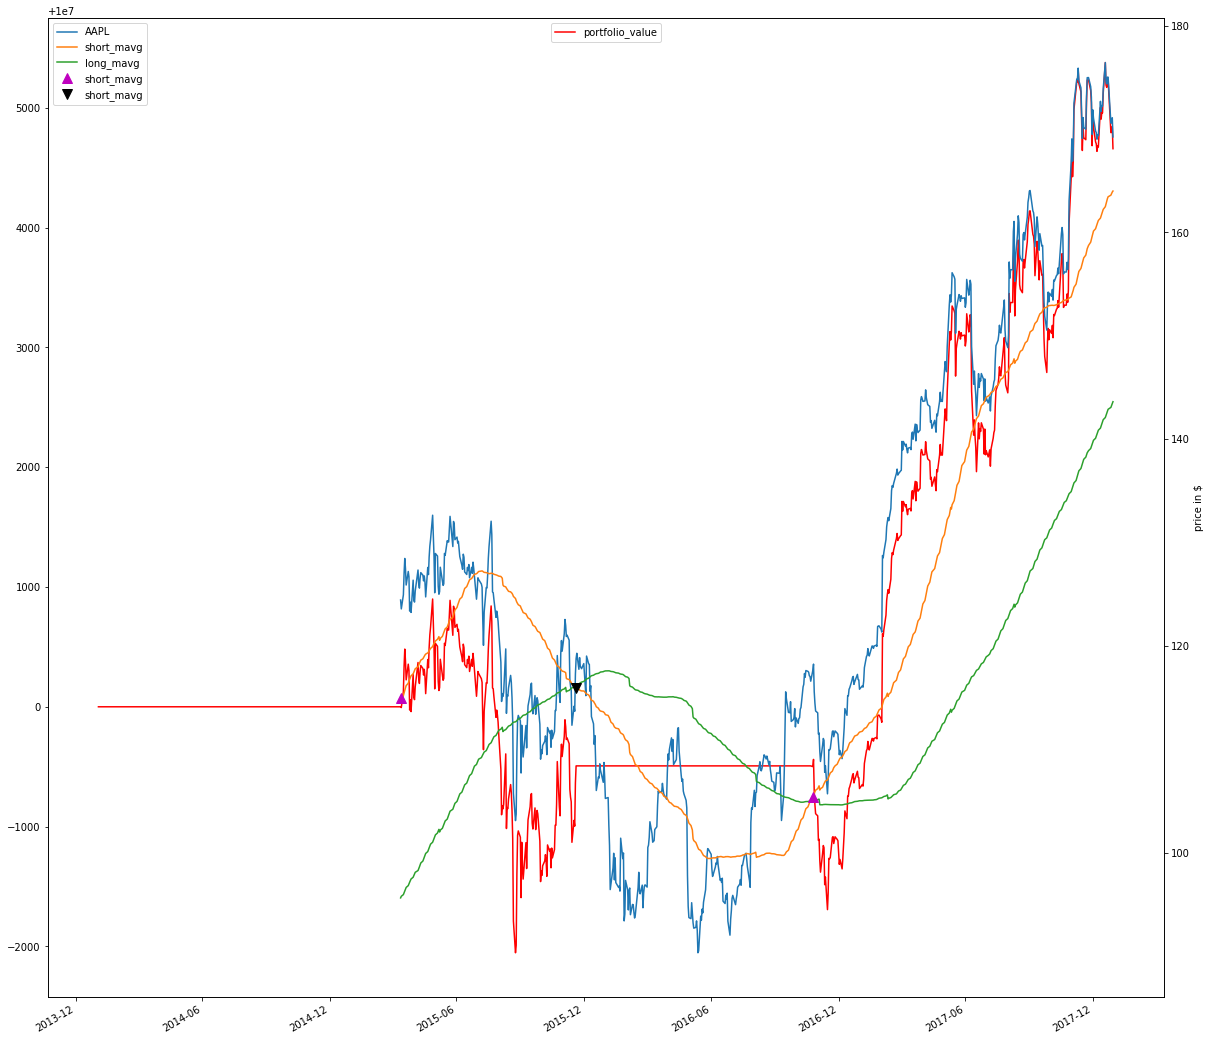

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,0.000102,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000204,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000307,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000409,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000511,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000613,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000715,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000818,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.000920,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.001022,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [28]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i=0
    context.asset = symbol('AAPL')

def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i +=1
    if context.i < 300:
        return
    
    #Compute averages
    #data.history
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency='1d').mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency='1d').mean()
    
    #Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to achieve the desred number of shares
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset,0)
    
    # Save values for later inspection
    record(AAPL=data.current(context.asset,'price'),
          short_mavg=short_mavg,
          long_mavg=long_mavg)

def analyze(context, perf):
    fig, ax = plt.subplots(figsize=(20,20))    
    perf.portfolio_value.plot(ax=ax,color='r')
    plt.legend(loc='upper center')
    ax.set_ylabel('porfolio value in $')
    ax1 = ax.twinx()
    
    perf['AAPL'].plot(ax=ax1)
    perf[['short_mavg','long_mavg']].plot(ax=ax1)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax1.plot(buys.index, perf.short_mavg.ix[buys.index],'^',markersize=10,color='m')
    ax1.plot(sells.index, perf.short_mavg.ix[sells.index],'v',markersize=10, color='k')
    ax1.set_ylabel('price in $')
    
    plt.legend(loc='upper left')
    plt.show()